In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image

In [4]:
# Function to check if an image is valid
def is_valid_image(filepath):
    try:
        with Image.open(filepath) as img:
            img.verify()
        return True
    except (IOError, SyntaxError) as e:
        print(f"Corrupted image file: {filepath} - {e}")
        return False

In [5]:
# Load and preprocess data
image_dir = Path('E:/Vehicle/Vehicle_5_classes_sample')

In [6]:
# Get filepaths and labels
filepaths = list(image_dir.glob(r'*/*'))
labels = [os.path.split(os.path.split(x)[0])[1] for x in filepaths]


In [7]:
# Filter out corrupted images
valid_filepaths = [str(fp) for fp in filepaths if is_valid_image(fp)]
valid_labels = [labels[i] for i, fp in enumerate(filepaths) if is_valid_image(fp)]

filepaths = pd.Series(valid_filepaths, name='Filepath')
labels = pd.Series(valid_labels, name='Label')


In [8]:
# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop=True)

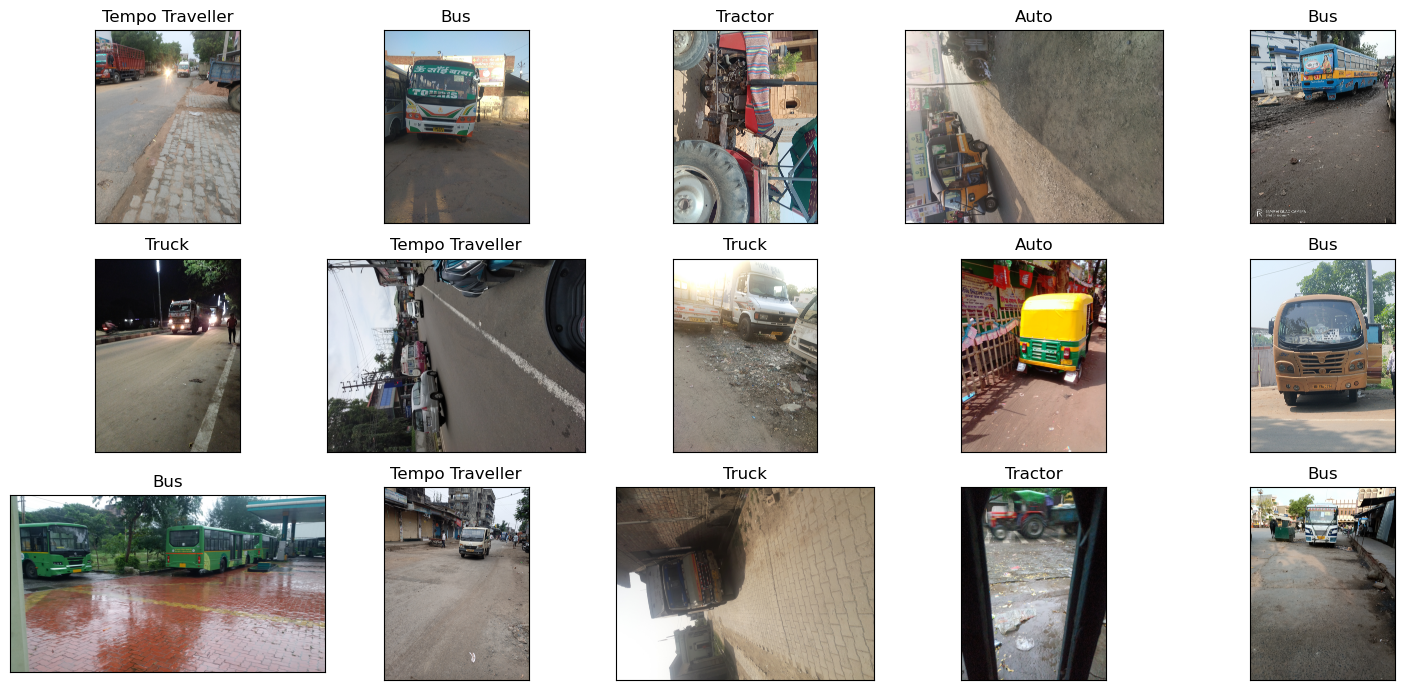

In [9]:
# Display some sample images
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    img = plt.imread(image_df.Filepath[i])
    ax.imshow(img)
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [10]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)


In [11]:
# Ensure the 'E:/Vehicle' directory exists
save_path = 'E:\Vehicle'
os.makedirs(save_path, exist_ok=True)

In [12]:
# Save the dataframes in the specified path
train_df.to_csv(os.path.join(save_path, 'train_df.csv'), index=False)
test_df.to_csv(os.path.join(save_path, 'test_df.csv'), index=False)